In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Importing the dataset
media = pd.read_csv("~/Desktop/mediacompany.csv")
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [4]:
type(media)

pandas.core.frame.DataFrame

In [6]:
# Checking Duplicates
sum(media.duplicated(subset = 'Date'))
# No duplicate values

0

In [7]:
# Dropping the unwanted column
media = media.drop('Unnamed: 7',axis = 1)
media.head()

In [10]:
media.dtypes

Date                   object
Views_show              int64
Visitors                int64
Views_platform          int64
Ad_impression           int64
Cricket_match_india     int64
Character_A             int64
dtype: object

In [11]:
media.shape

(80, 7)

In [12]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [13]:
media.describe()

,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
count,80.000000,8.000000e+01,8.000000e+01,8.000000e+01,80.000000,80.000000
mean,289902.625000,1.699066e+06,2.222401e+06,1.442374e+09,0.100000,0.375000
std,154924.323585,2.311571e+05,2.913510e+05,2.983186e+08,0.301893,0.487177
min,102520.000000,1.248183e+06,1.690727e+06,1.010868e+09,0.000000,0.000000
25%,185353.250000,1.550766e+06,2.010816e+06,1.207911e+09,0.000000,0.000000
50%,235807.000000,1.698843e+06,2.226270e+06,1.385931e+09,0.000000,0.000000
75%,350079.000000,1.817895e+06,2.388837e+06,1.632416e+09,0.000000,1.000000
max,758631.000000,2.344650e+06,3.064422e+06,2.424203e+09,1.000000,1.000000


In [14]:
# Checking Null values
media.isnull().sum()*100/media.shape[0]

Date                   0.0
Views_show             0.0
Visitors               0.0
Views_platform         0.0
Ad_impression          0.0
Cricket_match_india    0.0
Character_A            0.0
dtype: float64

In [ ]:
# There are no NULL values in the dataset, hence it is clean.

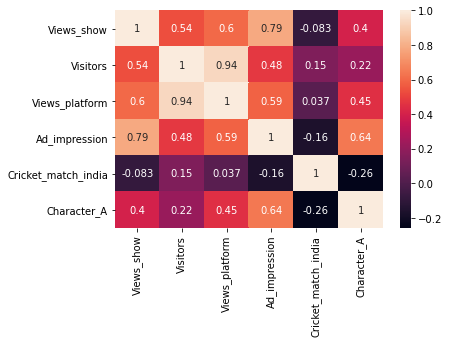

In [15]:
import seaborn as sns
sns.heatmap(media.corr(), annot = True)

In [ ]:
# Views_show is our target variable.
# All the other variables are input variables.
# Ad_impression is the most influential variable in predicting Views_show.
# Views_platform is also an important variable with a strong positive correlation.
# Ad_impression and character_A also have positive correlation.

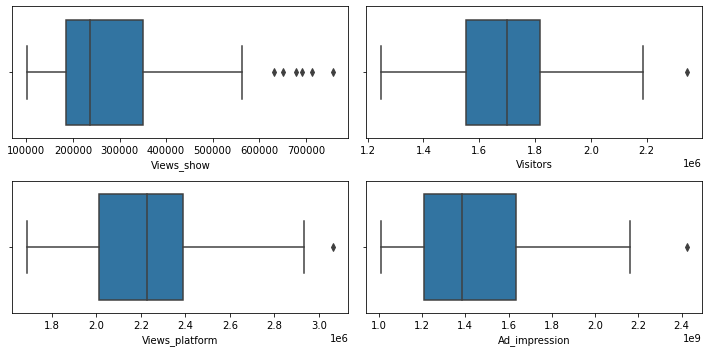

In [16]:
# Outlier Analysis
fig, axs = plt.subplots(2,2, figsize = (10,5))
plt1 = sns.boxplot(media['Views_show'], ax = axs[0,0])
plt2 = sns.boxplot(media['Visitors'], ax = axs[0,1])
plt3 = sns.boxplot(media['Views_platform'], ax = axs[1,0])
plt4 = sns.boxplot(media['Ad_impression'], ax = axs[1,1])

plt.tight_layout()

In [ ]:
# Views_show greater than 6000000 are outliers.
# Visitors greater than 2.2 are outliers.
# Views_platform greater than 3.0 are outliers.
# Ad_impression greater than 2.4 are outliers.

In [17]:
# Data Preparation
# Converting date to Pandas datetime format
media['Date'] = pd.to_datetime(media['Date'], dayfirst = False)

In [ ]:
# Date is in the format YYYY-MM-DD

In [18]:
# Deriving Matrices
media['Day_of_week'] = media['Date'].dt.dayofweek
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,6


In [ ]:
# Target Variable - Views_show()

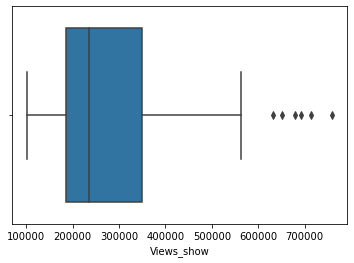

In [19]:
sns.boxplot(media['Views_show'])

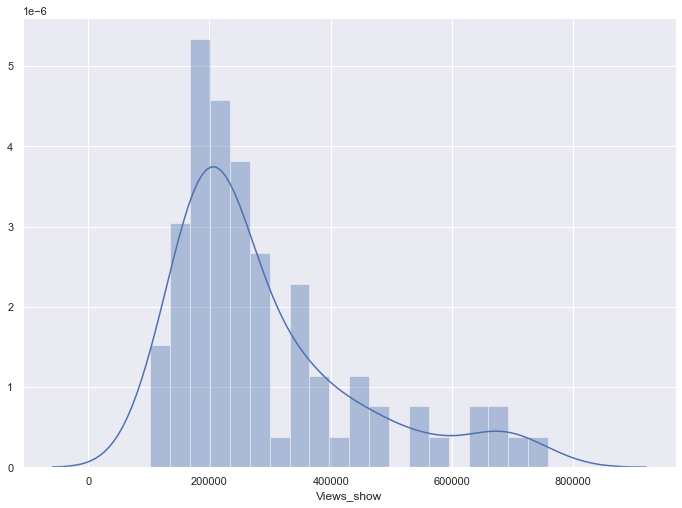

In [20]:
# EDA
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(media['Views_show'], bins=20)
plt.show()

In [ ]:
# After 500000, we have outliers.

In [23]:
# Removing outliers
media.drop(media.index[list((np.where(media['Views_show'] > 400000)))],inplace = True)

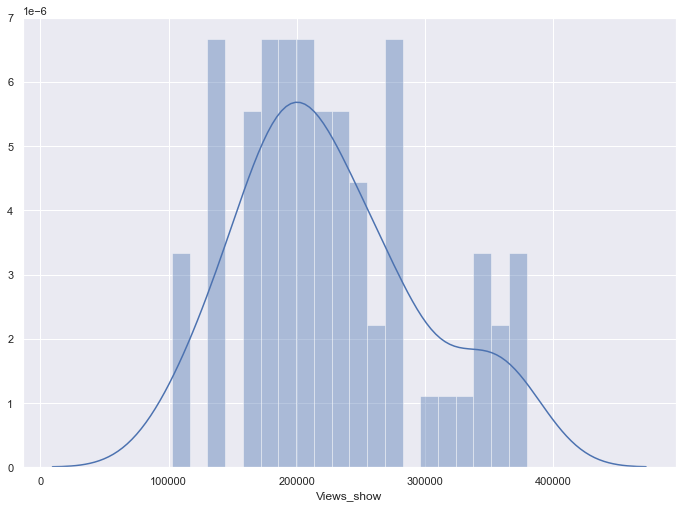

In [24]:
# EDA
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(media['Views_show'], bins=20)
plt.show()

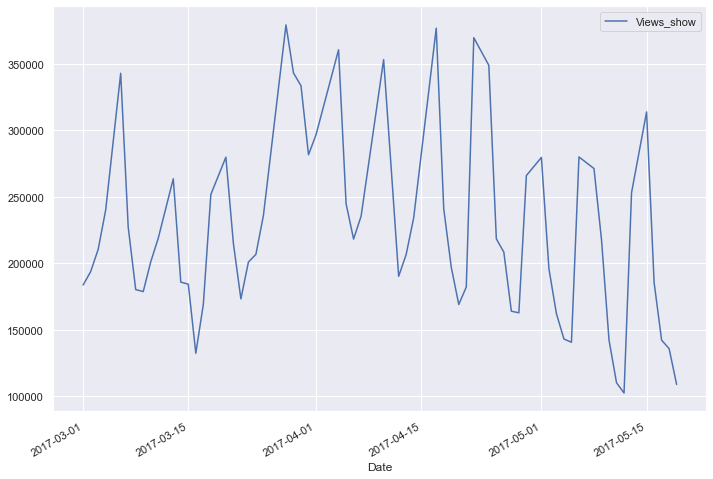

In [25]:
# days vs Views_show
media.plot.line(x='Date', y='Views_show')

In [ ]:
# Inference :
# We can observe a regular cyclic pattern in the plot.

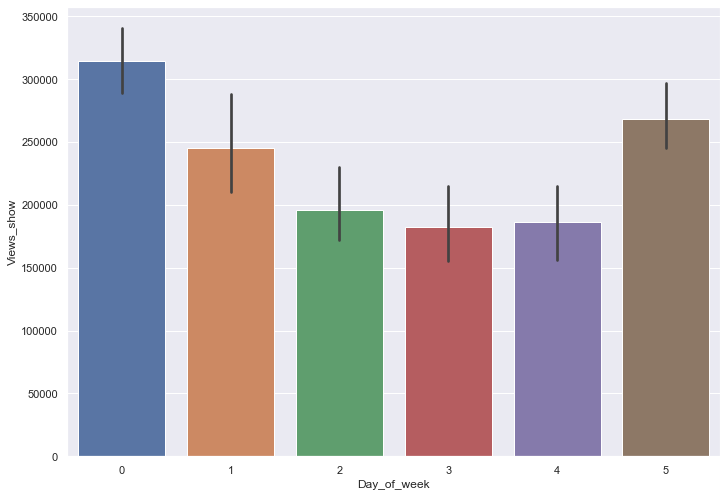

In [26]:
# Barplot
sns.barplot(data = media,x='Day_of_week', y='Views_show')

In [ ]:
# Inference :
# We can see that Views are more on 'Sunday' and 'Saturday'(weekends) and decline on subsequent days.

In [ ]:
# Hence we can think of another matrix "Weekend" that is 1 for weekends and 0 for weekdays.

In [27]:
# Adding weekend feature
di = {5:1, 6:1, 0:0, 1:0, 2:0, 3:0, 4:0}
media['weekend'] = media['Day_of_week'].map(di)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,2,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,3,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,4,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,5,1
5,2017-03-06,342997,1330689,1742540,1140228426,0,0,0,0


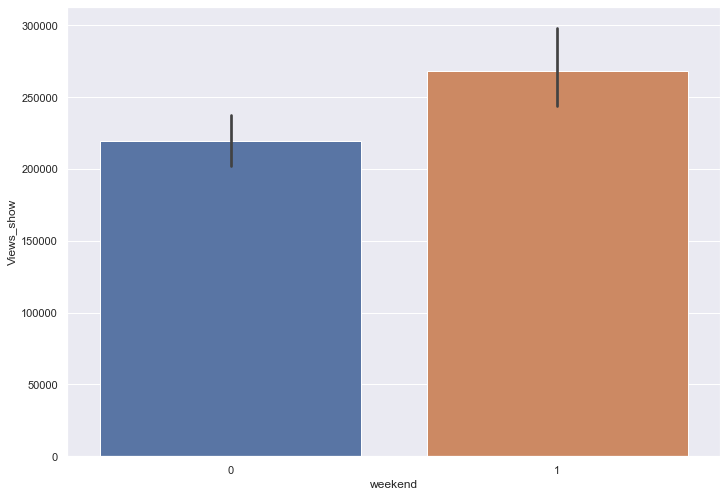

In [28]:
# BarPlot for weekend
sns.barplot(data = media,x='weekend', y='Views_show')

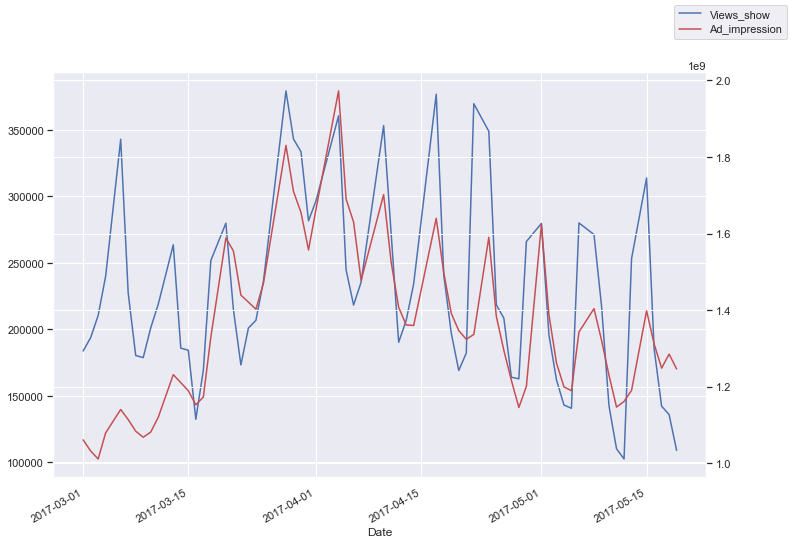

In [29]:
# Plot for Date vs Views_show and days vs Ad_impressions
ax = media.plot(x="Date", y="Views_show", legend=False)
ax2 = ax.twinx()
media.plot(x="Date", y="Ad_impression", ax=ax2, legend=False, color="r")
ax.figure.legend()

In [ ]:
# Views show and Ads_Impression show a similar cyclic behaviour.

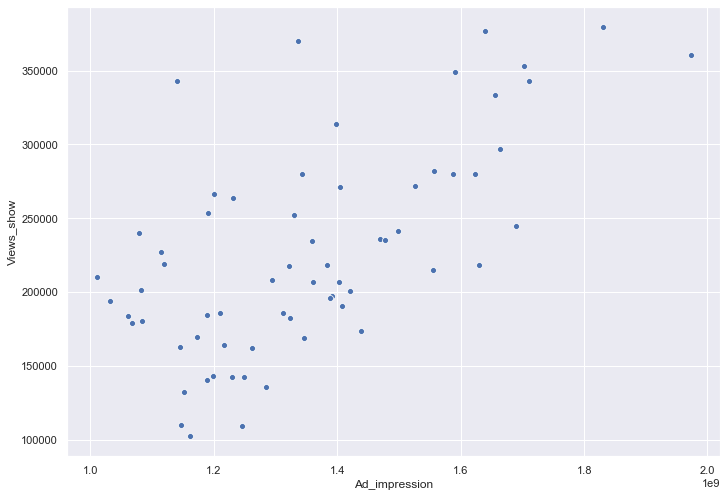

In [30]:
# Scatter Plot
sns.scatterplot(data = media, x = 'Ad_impression', y = 'Views_show')

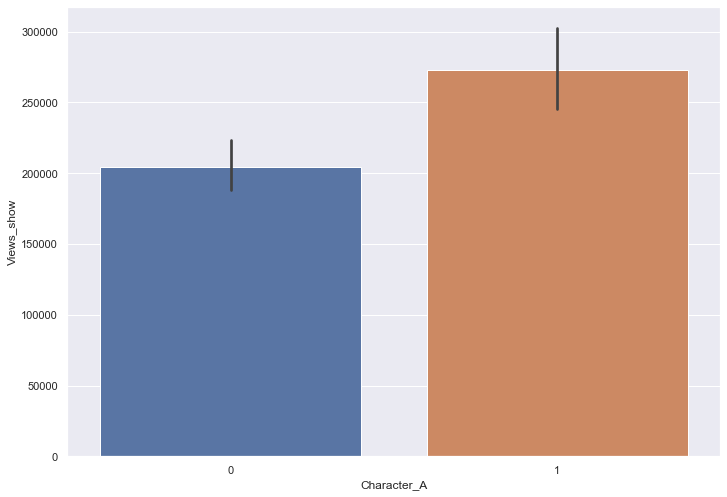

In [31]:
# Character A 
sns.barplot(data = media,x='Character_A', y='Views_show')

In [ ]:
# Presence of character A improves the performance.

In [ ]:
# Model Building 

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [33]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['Views_show','Visitors','Views_platform','Ad_impression']
media[num_vars] = scaler.fit_transform(media[num_vars])

In [34]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend
0,2017-03-01,0.293337,0.013456,0.015535,0.051973,0,0,2,0
1,2017-03-02,0.329545,0.024999,0.000000,0.021810,0,0,3,0
2,2017-03-03,0.389918,0.000000,0.034943,0.000000,0,0,4,0
3,2017-03-04,0.496760,0.273390,0.162364,0.071033,1,0,5,1
5,2017-03-06,0.868537,0.092168,0.051101,0.134484,0,0,0,0


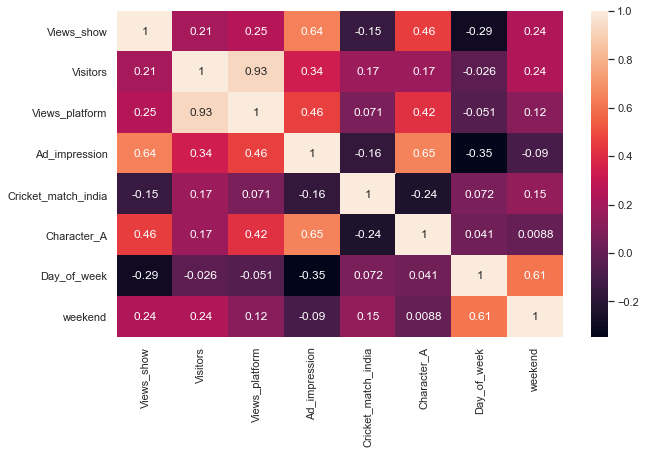

In [41]:
import seaborn as sns
plt.figure(figsize = (10, 6))
sns.heatmap(media.corr(), annot = True)

In [ ]:
# Ad Impression remain highlt corrrelated with Views Show.

In [36]:
# Separating X and y
X = media[['Visitors','weekend']]
y = media['Views_show']

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

In [39]:
# fit the model to the training data
lm.fit(X,y)

LinearRegression()

In [40]:
import statsmodels.api as sm
# Unlike Sk-Learn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.082
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.757
Date:                Wed, 10 Nov 2021   Prob (F-statistic):             0.0713
Time:                        21:06:34   Log-Likelihood:              -0.042324
No. Observations:                  65   AIC:                             6.085
Df Residuals:                      62   BIC:                             12.61
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3453      0.069      5.005      0.0

In [59]:
# Separating X and y
X = media[['Visitors','Ad_impression']]
y = media['Views_show']

In [60]:
from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

In [61]:
# fit the model to the training data
lm.fit(X,y)

LinearRegression()

In [62]:
import statsmodels.api as sm
# Unlike Sk-Learn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     21.95
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           6.19e-08
Time:                        21:15:49   Log-Likelihood:                 14.590
No. Observations:                  65   AIC:                            -23.18
Df Residuals:                      62   BIC:                            -16.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1888      0.060      3.137

In [78]:
# Separating X and y
X = media[['Ad_impression','Visitors']]
y = media['Views_show']

In [79]:
from sklearn.linear_model import LinearRegression
# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

In [80]:
# fit the model to the training data
lm.fit(X,y)

LinearRegression()

In [81]:
import statsmodels.api as sm
# Unlike Sk-Learn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     21.95
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           6.19e-08
Time:                        21:18:23   Log-Likelihood:                 14.590
No. Observations:                  65   AIC:                            -23.18
Df Residuals:                      62   BIC:                            -16.66
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1888      0.060      3.137

In [ ]:
# We have seen that views of today effects views of tomorrow. 
# So to take that in account we will create a Lag variable.

In [82]:
# Create lag variable
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Day_of_week,weekend,Lag_Views
0,2017-03-01,0.293337,0.013456,0.015535,0.051973,0,0,2,0,0.023263
1,2017-03-02,0.329545,0.024999,0.000000,0.021810,0,0,3,0,0.293337
2,2017-03-03,0.389918,0.000000,0.034943,0.000000,0,0,4,0,0.329545
3,2017-03-04,0.496760,0.273390,0.162364,0.071033,1,0,5,1,0.389918
5,2017-03-06,0.868537,0.092168,0.051101,0.134484,0,0,0,0,0.496760


In [83]:
media.Lag_Views[0] = 0

In [84]:
# Putting feature variable to X
X = media[['Visitors','Character_A','Lag_Views','weekend']]

# Putting response variable to y
y = media['Views_show']

In [85]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.404
Method:                 Least Squares   F-statistic:                     11.83
Date:                Wed, 10 Nov 2021   Prob (F-statistic):           3.76e-07
Time:                        21:21:22   Log-Likelihood:                 16.091
No. Observations:                  65   AIC:                            -22.18
Df Residuals:                      60   BIC:                            -11.31
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.1435      0.067      2.135      